In [42]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import random

In [10]:
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)

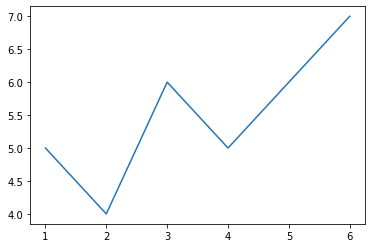

In [11]:
plt.plot(xs,ys)

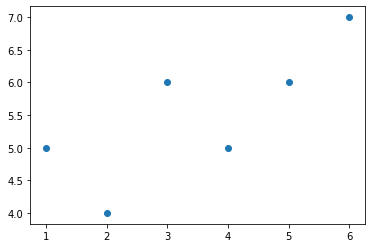

In [12]:
plt.scatter(xs,ys)

In [14]:
def best_fit_slope(xs,ys):
    m = (mean(xs)*mean(ys) - mean(xs*ys))/(mean(xs)*mean(xs) - mean(xs*xs))
    return m
m = best_fit_slope(xs,ys)

In [15]:
print(m)

0.42857142857142866


In [18]:
def y_intercept(xs,ys,m):
    b = mean(ys) - m*mean(xs)
    return b
b = y_intercept(xs,ys,m)

In [19]:
print(b)

4.0


In [20]:
best_fit_line = [(m*x) + b for x in xs]

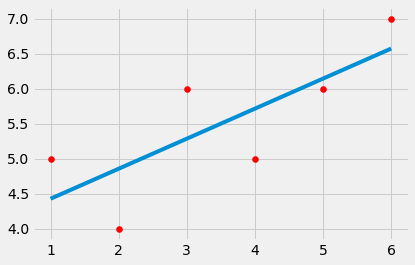

In [29]:
plt.scatter(xs,ys, color = 'r')
plt.plot(xs,best_fit_line)

In [39]:
#R Sqaured is the parameter that is the error that we use to check the accuracy of our best fit line
def squared_error(ys_original,ys_line):
    return sum((ys_line - ys_original)**2)
def r_squared_error(ys_original,ys_line):
    ys_mean_line = [mean(ys_original) for y in ys_original]
    squared_error_regr = squared_error(ys_original,ys_line)
    squared_error_y_mean = squared_error(ys_original,ys_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [41]:
r_squared =  r_squared_error(ys,best_fit_line)
print(r_squared)

0.5844155844155845
